<a href="https://colab.research.google.com/github/sasireddyvari/Inventory_Management/blob/master/Exploration_%26_Cleaning_Raw_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning of Data,Exploration of Data to make it consistent for Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Ecommerce/E commerce Project/Data_ecommerce project.csv')

In [4]:
# Quick data exploration
# Printing the dataset to explore ie first 10 rows
df.head()  

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,ORDERNO,OREDEREDQUANTITY,DELIVERYDATE,INVOICENO,DELIVEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN-2014 12.00.00.000000000 AM,219856,15.0,16-FEB-2014 12.00.00.000000000 AM,21300726,15.0
1,ES1,C00237,IT0001016,15-JAN-2014 12.00.00.000000000 AM,219857,750.0,11-FEB-2014 12.00.00.000000000 AM,21300626,750.0
2,ES1,C00237,IT0001024,15-JAN-2014 12.00.00.000000000 AM,219857,320.0,16-FEB-2014 12.00.00.000000000 AM,21300727,320.0
3,ES1,C00237,IT0001084,15-JAN-2014 12.00.00.000000000 AM,219857,250.0,11-FEB-2014 12.00.00.000000000 AM,21300626,250.0
4,ES3,C00196,IT0001076,27-MAR-2014 12.00.00.000000000 AM,255311,250.0,28-MAR-2014 12.00.00.000000000 AM,21301499,250.0


### Exploratory Data Analysis

In [5]:
# checking for shape of data

df.shape

(51290, 9)

In [6]:
# Checking if there are any null values in columns

df.isnull().sum()

ORDERTYPE            0
CUSTOMER             0
ITEMCODE             0
ORDERDATE            0
ORDERNO              0
OREDEREDQUANTITY     0
DELIVERYDATE         0
INVOICENO            0
DELIVEREDQUANTITY    0
dtype: int64

In [7]:
## Summary statistics for numerical fields
df.describe()

,ORDERNO,OREDEREDQUANTITY,INVOICENO,DELIVEREDQUANTITY
count,51290.000000,51290.000000,5.129000e+04,51290.000000
mean,261530.257731,804.710887,2.147239e+07,323.485761
std,18684.183311,2718.225194,1.112629e+05,1604.866920
min,219685.000000,-3500.000000,2.130000e+07,-3500.000000
25%,257207.000000,72.000000,2.140218e+07,56.000000
50%,260408.000000,250.000000,2.150270e+07,160.000000
75%,263897.000000,960.000000,2.160213e+07,320.000000
max,842035.000000,120000.000000,2.161415e+07,75000.000000


In [8]:
# Checking median as well and comparing with mean to see skewness of data
df['OREDEREDQUANTITY'].median()

250.0

In [ ]:
# From summary of statistics came to know some negative values 
# new_df=df.replace('-',' ',regex=True)

In [ ]:
# new_df.describe()

In [9]:
# Challenging thing is negative values are there and that rows can be dropped or replaced with 0 
# '-'can replaced with empty space using regex.(#Checking with domain experts we can place it accordingly )

# Here i replaced all negative values with 0. 

df[df['OREDEREDQUANTITY']<0] =0

In [10]:
df.describe() # so now minimum is zero now and negative values vanished

,ORDERNO,OREDEREDQUANTITY,INVOICENO,DELIVEREDQUANTITY
count,51290.000000,51290.000000,5.129000e+04,51290.000000
mean,260131.795886,805.616802,2.135401e+07,324.391676
std,26836.671506,2717.814670,1.594460e+06,1604.443244
min,0.000000,0.000000,0.000000e+00,0.000000
25%,257179.250000,72.000000,2.140204e+07,56.000000
50%,260385.000000,250.000000,2.150262e+07,160.000000
75%,263878.250000,960.000000,2.160213e+07,320.000000
max,842035.000000,120000.000000,2.161415e+07,75000.000000


In [12]:
# Changing 'ORDERDATE' column to only date & month(Since if it is deployed also ,it will be more feasible & can give the same)

df['ORDERDATE']=df.ORDERDATE.str.slice(0,6)
df['ORDERDATE']

0        15-JAN
1        15-JAN
2        15-JAN
3        15-JAN
4        27-MAR
          ...  
51285    25-SEP
51286    03-FEB
51287    25-APR
51288       NaN
51289    21-FEB
Name: ORDERDATE, Length: 51290, dtype: object

In [13]:
# 29th feburauy wont be there in year 2017 so as part of data cleaning changed to '1st March'

df.ORDERDATE.replace(['29-FEB'],['1-MAR'],inplace=True)

In [14]:
df.ORDERDATE.value_counts() # Checking whether ['29-FEB'] still exists or not.

05-MAR    349
09-FEB    325
11-FEB    313
23-MAY    297
10-MAR    293
         ... 
04-OCT     40
07-JUL     38
31-DEC     31
1-MAR      24
15-OCT     18
Name: ORDERDATE, Length: 365, dtype: int64

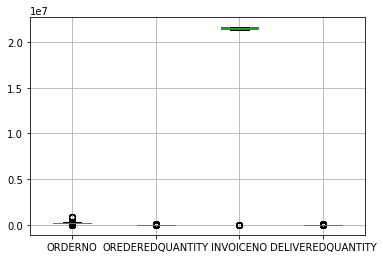

In [15]:
df.boxplot()  # Not focused on outliers since i am intersted in using algorithms which are roboust to outliers

In [17]:
df.corr() # Nothing much since features are very less and by information value we can select predictor values.

,ORDERNO,OREDEREDQUANTITY,INVOICENO,DELIVEREDQUANTITY
ORDERNO,1.000000,0.061954,0.729910,0.051984
OREDEREDQUANTITY,0.061954,1.000000,0.021259,0.740866
INVOICENO,0.729910,0.021259,1.000000,0.013694
DELIVEREDQUANTITY,0.051984,0.740866,0.013694,1.000000


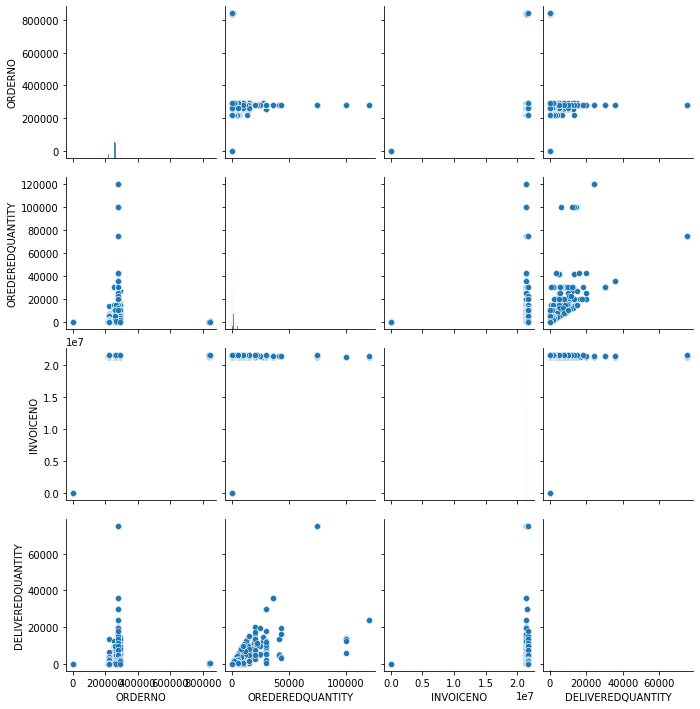

In [18]:
sb.pairplot(df) # Not much 

## Feature Selection & Feature creation

In [ ]:
df

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,ORDERNO,OREDEREDQUANTITY,DELIVERYDATE,INVOICENO,DELIVEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN-2014 12.00.00.000000000 AM,219856,15.0,16-FEB-2014 12.00.00.000000000 AM,21300726,15.0
1,ES1,C00237,IT0001016,15-JAN-2014 12.00.00.000000000 AM,219857,750.0,11-FEB-2014 12.00.00.000000000 AM,21300626,750.0
2,ES1,C00237,IT0001024,15-JAN-2014 12.00.00.000000000 AM,219857,320.0,16-FEB-2014 12.00.00.000000000 AM,21300727,320.0
3,ES1,C00237,IT0001084,15-JAN-2014 12.00.00.000000000 AM,219857,250.0,11-FEB-2014 12.00.00.000000000 AM,21300626,250.0
4,ES3,C00196,IT0001076,27-MAR-2014 12.00.00.000000000 AM,255311,250.0,28-MAR-2014 12.00.00.000000000 AM,21301499,250.0
5,ES1,C00110,IT0001088,01-APR-2014 12.00.00.000000000 AM,255331,480.0,21-APR-2014 12.00.00.000000000 AM,21301932,480.0
6,ES1,C00354,IT0001020,14-APR-2014 12.00.00.000000000 AM,255388,1280.0,15-APR-2014 12.00.00.000000000 AM,21301834,1280.0
7,ES1,C00354,IT0001012,14-APR-2014 12.00.00.000000000 AM,255388,1000.0,27-APR-2014 12.00.00.000000000 AM,21302070,1000.0
8,ES1,C00138,IT0001127,16-FEB-2014 12.00.00.000000000 AM,219892,280.0,21-MAR-2014 12.00.00.000000000 AM,21301312,280.0
9,ES1,C00138,IT0001137,16-FEB-2014 12.00.00.000000000 AM,219892,200.0,21-MAR-2014 12.00.00.000000000 AM,21301312,200.0


## Performance of the model depends..

#### Choice of Algorithm
#### Feature Selection
#### Feature Creation
#### Model selection

### Feature selection is also known as variable selection

### Bascially 3 types of 

#### Filter Methods ..> Single Factor Analysis
#### wrapper methods ..> Subset selection,forward selection,Backward seelction
#### Embedded method ...> Regularised Regression models



### Filter methods ..> Also some calls as Single Factor Analysis ie Preditictive power of each individual variable is evaluated.

### Using correlation with target variable &
### Information Value 


## Here features are less  and by information value removed 
### ..>ORDERNO,DELIVERYDATE,NVOICENO,DELIVEREDQUANTITY

In [ ]:
# Dropped ORDERNO','DELIVERYDATE','INVOICENO','DELIVEREDQUANTITY'

df.drop(columns=['ORDERNO','DELIVERYDATE','INVOICENO','DELIVEREDQUANTITY'],inplace=True)

In [ ]:
df.head()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,OREDEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN-2014 12.00.00.000000000 AM,15.0
1,ES1,C00237,IT0001016,15-JAN-2014 12.00.00.000000000 AM,750.0
2,ES1,C00237,IT0001024,15-JAN-2014 12.00.00.000000000 AM,320.0
3,ES1,C00237,IT0001084,15-JAN-2014 12.00.00.000000000 AM,250.0
4,ES3,C00196,IT0001076,27-MAR-2014 12.00.00.000000000 AM,250.0


## Feature Creation

In [ ]:
# Here date and month are important and that contributes more & year and other stuff doesnot matter.

# In 'ORDERDATE' column getting one field and checking length and accordingly will slice what ever i want for model building.

str='15-JAN-2014 12.00.00.000000000 AM'
len(str)

33

In [ ]:
# Changing 'ORDERDATE' column to only date & month(Since if it is deployed also ,it will be more feasible & can give the same)

df['ORDERDATE']=df.ORDERDATE.str.slice(0,6)

In [ ]:
df.head()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,OREDEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN,15.0
1,ES1,C00237,IT0001016,15-JAN,750.0
2,ES1,C00237,IT0001024,15-JAN,320.0
3,ES1,C00237,IT0001084,15-JAN,250.0
4,ES3,C00196,IT0001076,27-MAR,250.0
